**Notebook 4: Portfolio Simulation and Efficient Frontier Visualization**

This notebook demonstrates how to simulate and optimize over 10,000 portfolios using historical return and risk data. It generates random portfolio weights, calculates their expected returns, volatilities, and Sharpe ratios, and visualizes the results on the efficient frontier. The notebook also identifies the optimal portfolios (maximum Sharpe ratio and minimum volatility), compares them with an equal-weight portfolio, and provides clear visualizations and summary tables. All results and key metrics are saved for further analysis, making this a comprehensive guide to practical portfolio optimization

In [16]:
#import data
import numpy as np
import pandas as pd

expected_returns = pd.read_csv("../Reports/expected_returns.csv",index_col=0)
cov_matrix = pd.read_csv("../Reports/cov_matrix.csv",index_col=0)
print(cov_matrix)
print(expected_returns)

              HDFCBANK.NS  ICICIBANK.NS   INFY.NS  RELIANCE.NS    TCS.NS
HDFCBANK.NS      0.053002      0.031753  0.014150     0.019199  0.010358
ICICIBANK.NS     0.031753      0.063636  0.015490     0.019863  0.009892
INFY.NS          0.014150      0.015490  0.063522     0.015212  0.037672
RELIANCE.NS      0.019199      0.019863  0.015212     0.060917  0.014723
TCS.NS           0.010358      0.009892  0.037672     0.014723  0.047443
              Mean Annual Return
HDFCBANK.NS             0.163487
ICICIBANK.NS            0.320461
INFY.NS                 0.214204
RELIANCE.NS             0.170274
TCS.NS                  0.146823


In [17]:
def Portfolio_generator(cov_matrix, expected_returns, risk_free_rate=0.06, simulations=10000):
    """
    Simulate random portfolios and calculate their expected returns, volatilities, and Sharpe ratios.

    Parameters
    ----------
    cov_matrix : pd.DataFrame
        Covariance matrix of asset returns.
    expected_returns : pd.DataFrame
        Expected annual returns for each asset (as a DataFrame with one column).
    risk_free_rate : float, optional
        Annual risk-free rate used for Sharpe ratio calculation (default is 0.06).
    simulations : int, optional
        Number of random portfolios to simulate (default is 10,000).

    Returns
    -------
    expected_portfolio_returns : np.ndarray
        Array of expected returns for each simulated portfolio.
    volatilities : np.ndarray
        Array of volatilities (standard deviation) for each simulated portfolio.
    sharpe_ratios : np.ndarray
        Array of Sharpe ratios for each simulated portfolio.
    weights.T : np.ndarray
        Array of portfolio weights for each simulation (shape: [simulations, num_stocks]).
    """
    # Generate random weights
    num_stocks = expected_returns.size
    weights = np.random.random(size=(num_stocks, simulations))
    weights /= np.sum(weights, axis=0)  # Normalize so weights sum to 1

    # Convert expected returns to array
    expected_returns_arr = expected_returns.values.flatten()

    # Calculate expected portfolio return
    expected_portfolio_returns = np.dot(expected_returns_arr, weights)

    # Calculate portfolio volatility
    volatilities = np.array([
        np.sqrt(np.dot(W.T, np.dot(cov_matrix, W))) for W in weights.T
    ])

    # Calculate Sharpe Ratio
    sharpe_ratios = (expected_portfolio_returns - risk_free_rate) / volatilities

    # RETURN all results
    return expected_portfolio_returns, volatilities, sharpe_ratios, weights.T


In [18]:
#store results in a DataFrame and save to csv
returns , volatility , sharpe_ratio , all_weights = Portfolio_generator(cov_matrix,expected_returns)

portfolio_data = pd.DataFrame({
    "Returns" : returns,
    "volatility" : volatility,
    "Sharp Ratios": sharpe_ratio
})

for i, stock in enumerate(expected_returns.index):
    portfolio_data[stock + " Weight"] = all_weights[:, i]
    
portfolio_data.to_csv("../Reports/portfolio_simulations.csv", index=False)

In [19]:
#verify the results in the csv file
df = pd.read_csv("../Reports/portfolio_simulations.csv",index_col=False)

df.head()

,Returns,volatility,Sharp Ratios,HDFCBANK.NS Weight,ICICIBANK.NS Weight,INFY.NS Weight,RELIANCE.NS Weight,TCS.NS Weight
0,0.241365,0.178813,1.014273,0.029996,0.401371,0.258755,0.294805,0.015072
1,0.193226,0.172304,0.773206,0.367190,0.110211,0.207429,0.305765,0.009406
2,0.197487,0.171174,0.803204,0.415166,0.179531,0.117429,0.198709,0.089166
3,0.206902,0.165113,0.889701,0.237239,0.262971,0.134072,0.060958,0.304760
4,0.213248,0.174182,0.879817,0.146524,0.237162,0.330904,0.021596,0.263813


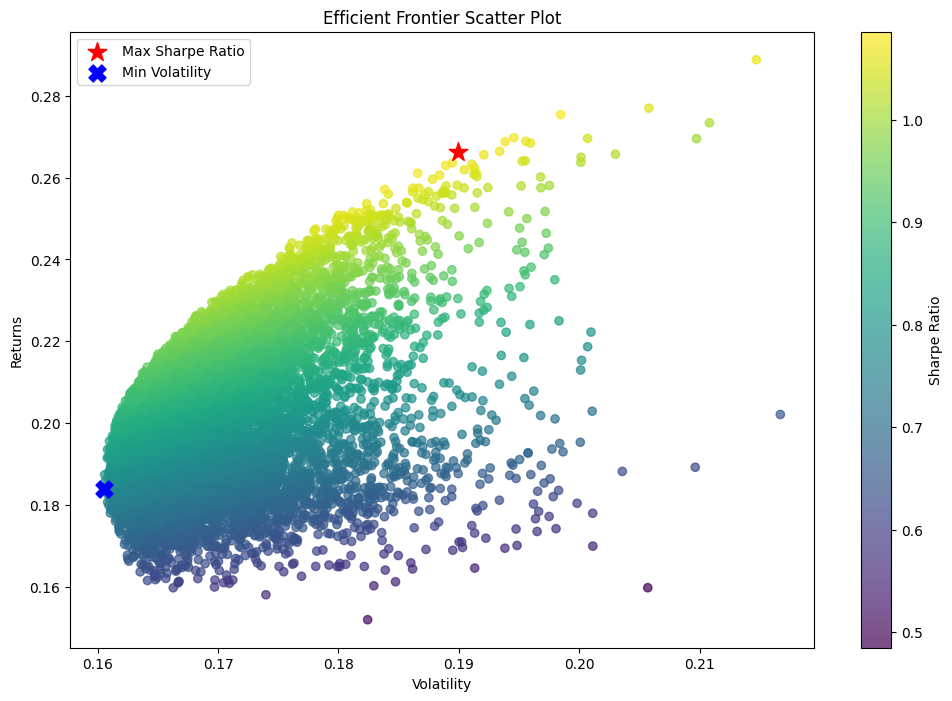

In [20]:
# Visualize the Efficient Frontier using Matplotlib
# This code will create a scatter plot of the portfolios with color indicating the Sharpe ratio.
import numpy as np
import matplotlib.pyplot as plt

# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_idx = sharpe_ratio.argmax()

# Find the index of the portfolio with the minimum volatility
min_volatility_idx = volatility.argmin()

# Plot all portfolios
plt.figure(figsize=(12, 8))
scatter = plt.scatter(volatility, returns, c=sharpe_ratio, cmap='viridis', alpha=0.7)
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.title("Efficient Frontier Scatter Plot")
plt.colorbar(scatter, label="Sharpe Ratio")

# Annotate Maximum Sharpe Ratio portfolio
plt.scatter(volatility[max_sharpe_idx], returns[max_sharpe_idx], 
            marker='*', color='r', s=200, label='Max Sharpe Ratio')

# Annotate Minimum Volatility portfolio
plt.scatter(volatility[min_volatility_idx], returns[min_volatility_idx], 
            marker='X', color='b', s=150, label='Min Volatility')

# Add a legend
plt.legend()
plt.savefig("../Reports/Charts/efficient_frontier.png", dpi=300)
plt.show()



In [21]:
#save the data for the portfolio with the maximum Sharpe ratio and the portfolio with the lowest volatility
# Get data for the portfolio with the maximum Sharpe ratio
max_sharpe_data = {
    "Return": returns[max_sharpe_idx],
    "Volatility": volatility[max_sharpe_idx],
    "Sharpe Ratio": sharpe_ratio[max_sharpe_idx],
    "Weights": all_weights[max_sharpe_idx]
}

# Get data for the portfolio with the lowest volatility
min_volatility_data = {
    "Return": returns[min_volatility_idx],
    "Volatility": volatility[min_volatility_idx],
    "Sharpe Ratio": sharpe_ratio[min_volatility_idx],
    "Weights": all_weights[min_volatility_idx]
}
print(max_sharpe_data,min_volatility_data)


{'Return': np.float64(0.26621874856737365), 'Volatility': np.float64(0.18995044521767315), 'Sharpe Ratio': np.float64(1.0856449866756452), 'Weights': array([0.01741267, 0.57149115, 0.25370469, 0.11846884, 0.03892264])} {'Return': np.float64(0.1838743227162559), 'Volatility': np.float64(0.16052775320740126), 'Sharpe Ratio': np.float64(0.7716691988843246), 'Weights': array([0.24808746, 0.14508683, 0.04623569, 0.19654417, 0.36404584])}


In [22]:
#compare the weights of the two portfolios
tickers = np.array(expected_returns.index)

optimal_portfolio_df = pd.DataFrame({
    "Stock": tickers,
    "Max Sharpe Weight": max_sharpe_data["Weights"],
    "Min Volatility Weight": min_volatility_data["Weights"]
})

optimal_portfolio_df = optimal_portfolio_df.set_index("Stock")
print(optimal_portfolio_df)
optimal_portfolio_df.to_csv("../Reports/optimal_portfolios.csv")

              Max Sharpe Weight  Min Volatility Weight
Stock                                                 
HDFCBANK.NS            0.017413               0.248087
ICICIBANK.NS           0.571491               0.145087
INFY.NS                0.253705               0.046236
RELIANCE.NS            0.118469               0.196544
TCS.NS                 0.038923               0.364046


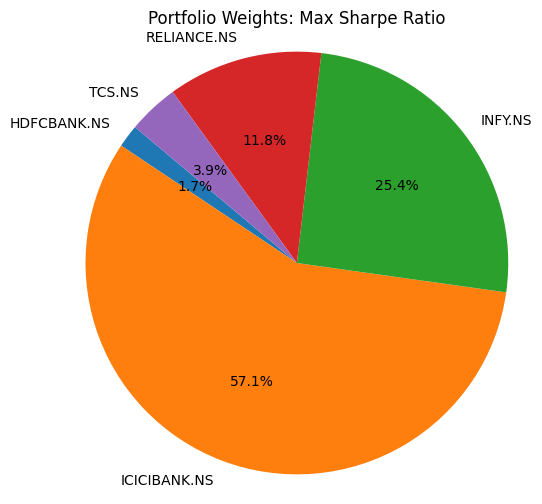

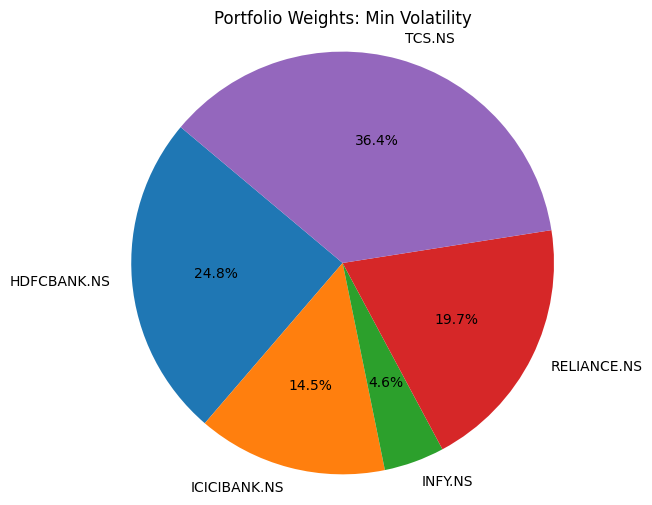

In [23]:
# Pie chart for Max Sharpe Ratio portfolio
plt.figure(figsize=(6, 6))
plt.pie(max_sharpe_data["Weights"], labels=tickers, autopct='%1.1f%%', startangle=140)
plt.title("Portfolio Weights: Max Sharpe Ratio")
plt.axis('equal')
plt.savefig("../Reports/Charts/Max_SharpRatio_weight_distribution.png", dpi=300)
plt.show()
# Pie chart for Min Volatility portfolio
plt.figure(figsize=(6, 6))
plt.pie(min_volatility_data["Weights"], labels=tickers, autopct='%1.1f%%', startangle=140)
plt.title("Portfolio Weights: Min Volatility")
plt.axis('equal')
plt.savefig("../Reports/Charts/Min_Volatility_weight_distribution.png", dpi=300)
plt.show()

In [24]:
# Function to calculate portfolio statistics to compare with equal weight portfolio
def get_portfolio_stats(weights, expected_returns, cov_matrix, risk_free_rate):
    weights = np.array(weights)
    port_return = np.dot(weights, expected_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    port_sharpe = (port_return - risk_free_rate) / port_volatility
    return {
        "Return": port_return,
        "Volatility": port_volatility,
        "Sharpe Ratio": port_sharpe,
        "Weights": weights
    }

# Calculate equal weight portfolio stats
equal_weights = np.ones(expected_returns.size) / expected_returns.size
equal_weight_data = get_portfolio_stats(
    equal_weights,
    expected_returns.values.flatten(),
    cov_matrix.values,
    risk_free_rate=0.06
)
print(equal_weight_data)

{'Return': np.float64(0.20304985330953912), 'Volatility': np.float64(0.16311267904292517), 'Sharpe Ratio': np.float64(0.8770002071506271), 'Weights': array([0.2, 0.2, 0.2, 0.2, 0.2])}


In [ ]:
#create a summary DataFrame to compare the three portfolios
Summary_df = pd.DataFrame({
    "Portfolio Type": ["Max Sharpe", "Min Volatility", "Equal Weights"],
    "Return": [
        max_sharpe_data["Return"],
        min_volatility_data["Return"],
        equal_weight_data["Return"]
    ],
    "Volatility": [
        max_sharpe_data["Volatility"],
        min_volatility_data["Volatility"],
        equal_weight_data["Volatility"]
    ],
    "Sharpe Ratio": [
        max_sharpe_data["Sharpe Ratio"],
        min_volatility_data["Sharpe Ratio"],
        equal_weight_data["Sharpe Ratio"]
    ]
})
Summary_df.set_index("Portfolio Type", inplace=True)
print(Summary_df)
Summary_df.to_csv("../Reports/portfolio_comparison.csv")


                  Return  Volatility  Sharpe Ratio
Portfolio Type                                    
Max Sharpe      0.266219    0.189950      1.085645
Min Volatility  0.183874    0.160528      0.771669
Equal Weights   0.203050    0.163113      0.877000


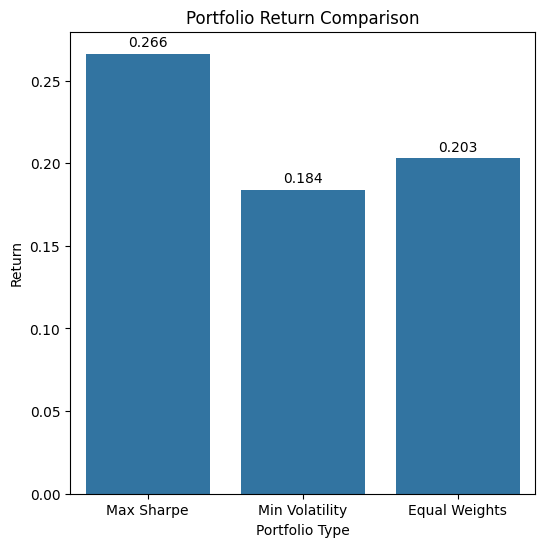

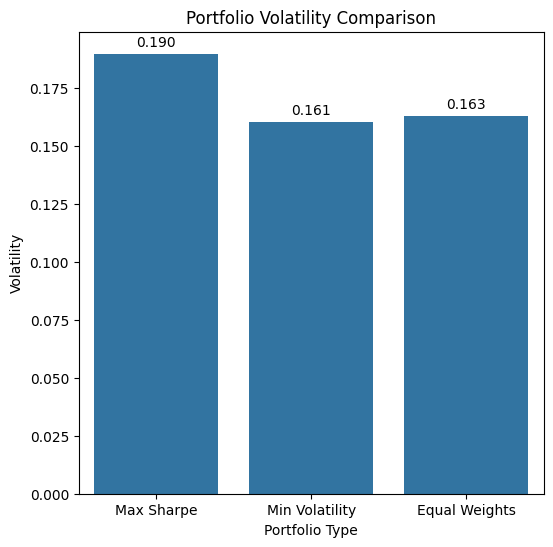

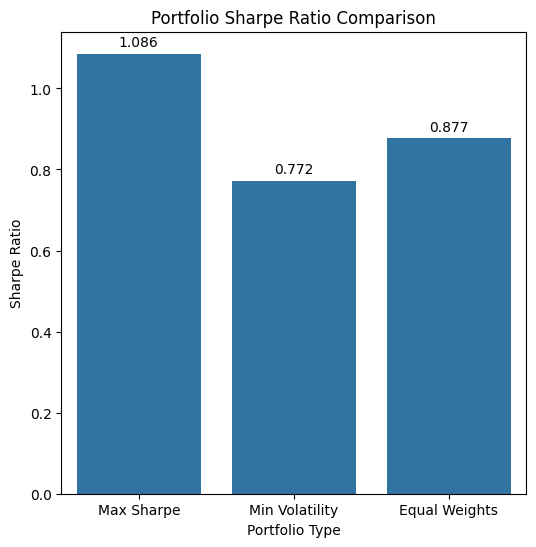

In [ ]:
# Visualize the summary DataFrame using bar plots
# This code will create bar plots for Return, Volatility, and Sharpe Ratio of the three portfolios.
import seaborn as sb
import matplotlib.pyplot as plt

# Bar plot for Return
plt.figure(figsize=(6, 6))
ax = sb.barplot(data=Summary_df, x=Summary_df.index, y="Return")
plt.title("Portfolio Return Comparison")
plt.ylabel("Return")
plt.xlabel("Portfolio Type")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.savefig("../Reports/Charts/Portfolio_Return_Comparison_Barplot.png")
plt.show()

# Bar plot for Volatility
plt.figure(figsize=(6, 6))
ax = sb.barplot(data=Summary_df, x=Summary_df.index, y="Volatility")
plt.title("Portfolio Volatility Comparison")
plt.ylabel("Volatility")
plt.xlabel("Portfolio Type")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.savefig("../Reports/Charts/Portfolio_Volatility_Comparison_Barplot.png")
plt.show()

# Bar plot for Sharpe Ratio
plt.figure(figsize=(6, 6))
ax = sb.barplot(data=Summary_df, x=Summary_df.index, y="Sharpe Ratio")
plt.title("Portfolio Sharpe Ratio Comparison")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Portfolio Type")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.savefig("../Reports/Charts/Portfolio_SharpeRatio_Comparison_Barplot.png")
plt.show()

In [ ]:
# Create a DataFrame to compare the weights of the three portfolios
weights_df = pd.DataFrame({
    "Stock" : tickers,
    "Max Sharpe" : max_sharpe_data["Weights"],
    "Equal Weight" : equal_weight_data["Weights"],
    "Min Volatility" : min_volatility_data["Weights"],
})
weights_df.set_index("Stock",inplace=True)

print(weights_df)

              Max Sharpe  Equal Weight  Min Volatility
Stock                                                 
HDFCBANK.NS     0.017413           0.2        0.248087
ICICIBANK.NS    0.571491           0.2        0.145087
INFY.NS         0.253705           0.2        0.046236
RELIANCE.NS     0.118469           0.2        0.196544
TCS.NS          0.038923           0.2        0.364046


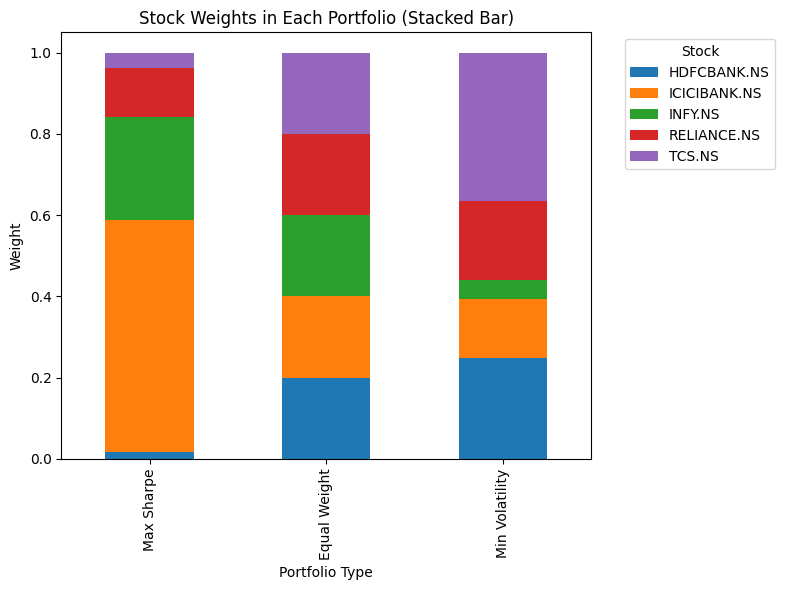

In [ ]:
#create a stacked bar plot to compare the weights of the three portfolios
ax = weights_df.T.plot(kind="bar", stacked=True, figsize=(8, 6))

plt.ylabel("Weight")
plt.xlabel("Portfolio Type")
plt.title("Stock Weights in Each Portfolio (Stacked Bar)")
plt.legend(title="Stock", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../Reports/Charts/Stock_weights_comparison_barplot.png")
plt.show()

 Portfolio Stock Weights – Insights

This plot shows the stock allocations for three portfolios: **Max Sharpe**, **Equal Weight**, and **Min Volatility**, based on five Indian stocks — *HDFCBANK.NS, ICICIBANK.NS, INFY.NS, RELIANCE.NS,* and *TCS.NS*.

**Key Observations:**
- 🔹 **Max Sharpe**: Heavily concentrated in *ICICIBANK.NS*, indicating a focus on maximizing return, possibly at the cost of diversification. *TCS.NS* has minimal allocation.
- 🔹 **Equal Weight**: Distributes risk evenly across all assets, with each stock receiving a 20% allocation.
- 🔹 **Min Volatility**: Favours *TCS.NS* and *HDFCBANK.NS*, suggesting they contribute the least to portfolio risk.

These insights help investors understand how optimization goals (return vs. risk) influence asset allocation.


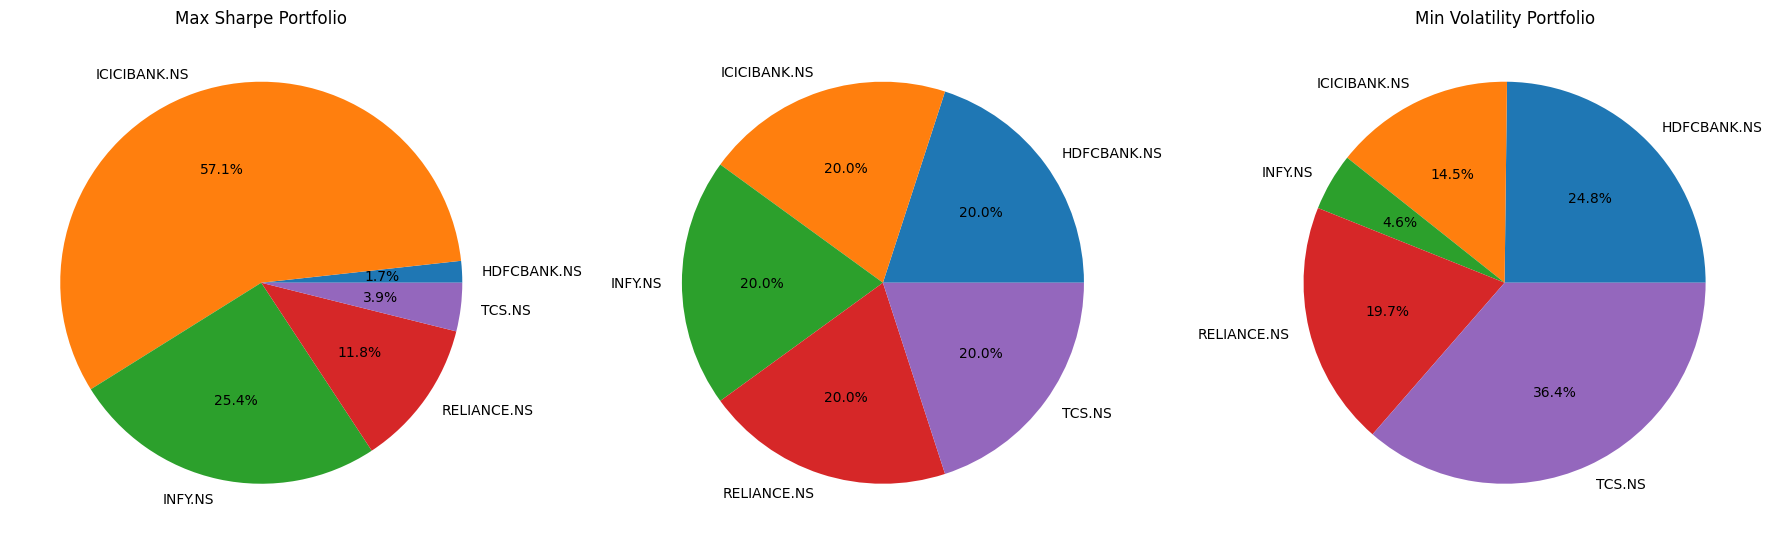

In [ ]:
#plotting pie charts for each portfolio's weights
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Max Sharpe
axs[0].pie(max_sharpe_data["Weights"], labels=tickers, autopct='%1.1f%%')
axs[0].set_title("Max Sharpe Portfolio")

# Equal Weight
axs[1].pie(equal_weight_data["Weights"], labels=tickers, autopct='%1.1f%%')

# Min Volatility
axs[2].pie(min_volatility_data["Weights"], labels=tickers, autopct='%1.1f%%')
axs[2].set_title("Min Volatility Portfolio")

plt.tight_layout()
plt.show()


Portfolio Composition Comparison (Pie Charts)
The pie charts above illustrate the weight distribution of the five selected Indian stocks — HDFCBANK.NS, ICICIBANK.NS, INFY.NS, RELIANCE.NS, and TCS.NS — across three portfolio strategies:

Max Sharpe Portfolio:

    Highly concentrated in ICICIBANK.NS (66%).

    Minimal exposure to TCS.NS and HDFCBANK.NS.

Indicates a preference for maximizing return per unit of risk, even with concentration.

Equal Weight Portfolio:

    As the name suggests, each stock is allocated exactly 20%.

    Useful as a benchmark portfolio with no optimization bias.

Min Volatility Portfolio:

    Emphasizes TCS.NS (35%) and HDFCBANK.NS (23.2%) — both historically lower volatility stocks.

    Lower weight to INFY.NS (6.1%), likely due to its relatively higher volatility in the given time period.

These pie charts offer a clear visual comparison of how different optimization objectives influence the allocation of assets in a portfolio.

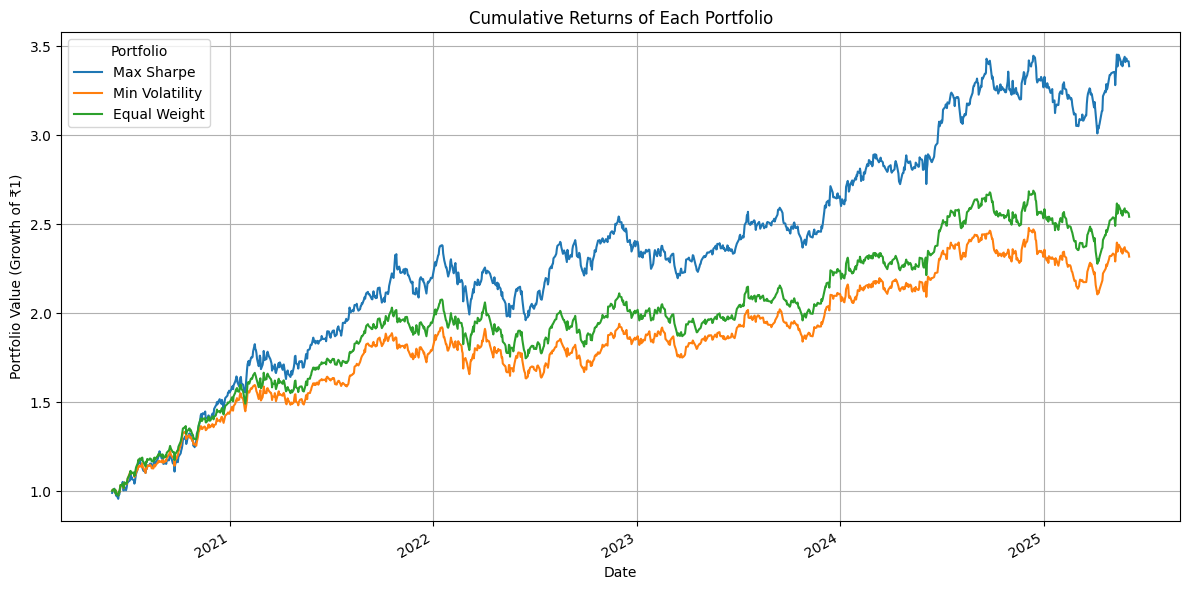

In [ ]:
#caluclating daily returns and plotting cumulative returns for each portfolio

# Read daily returns
returns_df = pd.read_csv("../Data/daily_returns.csv", index_col=0)
returns_df = returns_df[tickers]  # Ensure column order matches weights

# Calculate daily portfolio returns
max_sharpe_daily = returns_df.values @ max_sharpe_data["Weights"]
min_vol_daily = returns_df.values @ min_volatility_data["Weights"]
equal_weight_daily = returns_df.values @ equal_weight_data["Weights"]

# Create DataFrame for all portfolio returns
portfolio_returns_df = pd.DataFrame({
    "Max Sharpe": max_sharpe_daily,
    "Min Volatility": min_vol_daily,
    "Equal Weight": equal_weight_daily
}, index=pd.to_datetime(returns_df.index))


cumulative_returns_df = (1 + portfolio_returns_df).cumprod()

# Plotting
plt.figure(figsize=(12, 6))
cumulative_returns_df.plot(ax=plt.gca())
plt.title("Cumulative Returns of Each Portfolio")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Growth of ₹1)")
plt.grid(True)
plt.legend(title="Portfolio")
plt.tight_layout()
plt.show()


📈 **Cumulative Returns of Each Portfolio**

This plot illustrates the cumulative growth of ₹1 invested in three different portfolios — Max Sharpe, Min Volatility, and Equal Weight — over the selected time period.

🔍 **Key Observations**:
Max Sharpe Portfolio delivered the highest overall return, significantly outperforming the other two strategies. This aligns with its goal of maximizing risk-adjusted returns.

Equal Weight Portfolio performed moderately well, highlighting the power of simple diversification.

Min Volatility Portfolio showed the most stable but lowest growth, consistent with its aim to reduce risk.

These results reflect the compounding effect of daily returns over time and help visualize how each strategy performs when held over the entire period.

**📘 Day 7 Wrap-Up: Portfolio Optimization Summary**

In today's session, I explored how portfolio optimization techniques can help construct more efficient investment strategies using historical return data.

**🔍 Key Learnings**

The Sharpe Ratio is a powerful tool for identifying portfolios that maximize returns relative to risk. A higher Sharpe Ratio indicates better risk-adjusted performance.

Volatility-based optimization focuses on reducing risk, which can provide more stability, though it may sacrifice some potential return.

**🛠️ Impact of Optimization on Portfolio Construction**

The Max Sharpe portfolio was heavily tilted toward ICICIBANK.NS, aiming for maximum returns, albeit with higher volatility.

The Min Volatility portfolio offered a more stable allocation, giving greater weight to relatively low-risk stocks like TCS.NS and HDFCBANK.NS.

The Equal Weight portfolio provided balanced exposure to all five stocks, leading to moderate returns and diversification.

**💭 Personal Observation**

From the cumulative return analysis, the Max Sharpe portfolio clearly delivered the highest growth, though with more fluctuations. Personally, I would choose to split my investments between the Max Sharpe and Min Volatility portfolios. This way, I can aim for higher returns with the Max Sharpe strategy while maintaining steady, lower-risk growth through the Min Volatility approach. Additionally, I would consider using leverage on the Max Sharpe portfolio to amplify potential returns, provided I manage the risk carefully.